In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import collections

In [2]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/emmabradley/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
conn = sqlite3.connect("tiktok.db")


# get tik toks from past # of days
cmd = \
    f"""
    SELECT id, video_title, sound_transcribed, upload_time, view, date_pulled
    FROM tiktok
    """ 

tiktoks = pd.read_sql_query(cmd, conn)

# close database
conn.close()

In [4]:
tiktoks.head()

,id,video_title,sound_transcribed,upload_time,view,date_pulled
0,7037034323417107759,EXCUSE MI THIS FANSERVICE THO 😩 #fyp #bts #bts...,NA,https://v16-webapp.tiktok.com/c236514e9e9afb02...,63900000,2022-02-05 21:47:29.655314
1,7059020753978789166,🐈Are you envious? #fy #kitty #cat #love #kiss,NA,https://v16-webapp.tiktok.com/19acdfd3ecbceb5f...,5400000,2022-02-05 21:47:34.643344
2,7061272988615707950,Fyp,Bonanza,https://v16-webapp.tiktok.com/e4d4117e4cd54b88...,3800000,2022-02-05 21:47:36.679836
3,7039714932283362607,100% the truth! ❤️,beautiful,https://v16-webapp.tiktok.com/66467801dcb7df68...,37900000,2022-02-05 21:47:38.630341
4,7056048829749218607,,NA,https://v16-webapp.tiktok.com/fd0801d14a758eef...,8300000,2022-02-05 21:47:44.502847


In [5]:
audio_tiktoks = tiktoks[tiktoks["sound_transcribed"] != "NA"]
audio_tiktoks = audio_tiktoks.drop_duplicates(subset='id')
audio_tiktoks.size

810

In [6]:
for title in audio_tiktoks["video_title"][:10]:
    sid = SentimentIntensityAnalyzer()
    print(title)
    ss = sid.polarity_scores(title)
    for k in sorted(ss):
        print('{0}: {1}, '.format(k, ss[k]), end='')
    print()

Fyp
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
100% the truth! ❤️
compound: 0.3802, neg: 0.0, neu: 0.536, pos: 0.464, 

compound: 0.0, neg: 0.0, neu: 0.0, pos: 0.0, 
she really tried to kick us off the plane.😂😂 @theskimaskgirl
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Roni does another TikTok #dance! #flipbook
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
#cute #dog
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
MANY PPL ASKED. <3 GTG TO SCHOOL #fyp #foryou #tysm #A+K
compound: 0.4404, neg: 0.0, neu: 0.775, pos: 0.225, 
How Tiktok behind the scenes are… 😂 @coreyscherer
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He just want to hangout w me and all I do is bully him 😔 #foryou #fyp #baby #brother
compound: -0.4404, neg: 0.173, neu: 0.757, pos: 0.07, 
#trending #fyp #manga #anime #killua #animetiktok
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 


In [7]:
ss = [SentimentIntensityAnalyzer().polarity_scores(title) for title in audio_tiktoks["video_title"]]
ss[0]

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [8]:
add_dict = collections.Counter({'neu': 0.0, 'pos': 0.0, 'compound': 0.0, 'neg': 0.0})

for s in ss:
    counter = collections.Counter(s)
    add_dict += counter
    dict_ss = dict(add_dict)

# take the average score
for k in dict_ss.keys():
    dict_ss[k] = dict_ss[k]/len(dict_ss)

dict_ss

{'neu': 26.78975, 'pos': 2.42075, 'compound': 2.51145, 'neg': 0.78975}

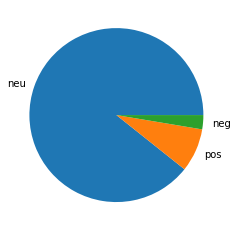

<Figure size 432x288 with 0 Axes>

In [34]:
dict_data = dict_ss.copy()
dict_data.pop('compound')
plot = plt.pie(dict_data.values(), labels=dict_data.keys())
plt.show()
plt.savefig('mypietest.png')

In [12]:
type(plot)

tuple

In [13]:
len(plot)

2

In [36]:
plot[0]

In [15]:
plot[1]

[Text(-1.0384166798805563, 0.3628922690632063, 'neu'),
 Text(1.004889981771846, -0.4474328156657482, 'pos'),
 Text(1.0962404031404607, -0.09086791800432174, 'neg')]

In [30]:
plot.savefig('mypietest.png')

AttributeError: 'tuple' object has no attribute 'savefig'